<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2022</h1>
<h2>Pràctica 2 - Exploració: Grafs, DFS, BFS, Dijkstra</h2>
</center>
</div>

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<div class="alert alert-info">
<h2>Avís general per a les Pràctiques de Laboratori</h2>

És molt important <b>comentar tot el vostre codi</b>. Comentar el codi no només facilita a altres persones que el llegeixin la compressió del que esteu fent, sinó també a vosaltres mateixos durant el procés de disseny i implementació. D'aquesta forma podreu entendre el vostre propi codi encara que faci molt temps que no el consulteu. A més, a l'hora de ser corregits, un codi comentat s'entén molt millor, la qual cosa ajuda a traslladar al professor les idees que teníeu a l'intentar implementar-lo i encara més en el cas que no ho hagueu pogut acabar-ho amb èxit. No cal comentar cada línia, però si el que fa cada part.

En segon lloc, és molt important <b>respectar les capçaleres de les funcions i estructura de la funció ```return```</b> que s'indiquin a l'enunciat. Tot i que llegim i corregim els vostres codis en detall, fem servir correctors automàtics per guiar i agilitzar el procés i saber quines solucións funcionen i quines no ja d'entrada. 

Axí doncs, si es demana que la funció tingui la següent estructura: 

```python
def exercici1(param1, param2):
    # implementació de la solució
    return resultat 
```

És important que en el notebook existeixi aquesta funció i que no canvieu el nom dels paràmetres ni el tipus de dada retornada.
    
</div>




<div class="alert alert-warning">
<h2>Sobre la correcció d'aquesta pràctica...</h2>
Com veureu a la capçalera de cada exercici, tots ells tenen una puntuació màxima de 2.5 punts. En tots, es valoraran aquests quatre aspectes:
    <ol>
        <li> El codi <b>s'executa correctament</b>, és a dir, retorna la solució demanada.
        <li> El codi és <b>eficient</b>, és a dir, no fa més càlculs dels necessaris.
        <li> El codi està <b>ben comentat</b>. No cal comentar cada línea de codi però si que es necessari que expliqueu què s'està fent als diferents blocs.
        <li> Les preguntes dels exercicis que en tenen estan respostes i la solució és correcta.
    </ol>
</div>




## maze.py

La llibreria auxiliar ```maze.py```, conté les funcions necessàries per crear i dibuixar laberints aleatoris. A continuació destaquem les funcions més rellevants tot i que podeu obrir el fitxer i investigar.

- ```Maze(x_num, y_num, seed=None, p_down=0.2, p_build=0)```: Aquesta funció construeix i retorna un laberint aleatori de dimensió $x_\text{num} \times y_\text{num}$. El paràmetre $\textit{seed}$ permet fixar una llavor de forma que sempre es generi el mateix laberint. És interessant que, un cop hagueu programat la solució dels exercicis, proveu de modificar-lo per veure que funciona en diferents casos. Els paràmetres $p_\text{down}$ i $p_\text{build}$ són probabilitats de destrucció d'una paret o de construcció. Així, si $p_\text{down}$ és proper a 1, s'eliminen gairebé totes les parets del laberint, creant molts camins entre totes les cel·les. En canvi, si $p_\text{build}$ és proper a 1, es crearan parets que faran que el laberint no tingui solució per a gairebé cap parella de cel·les.

- ```maze.display_maze(height=200, plot_path=False)```: Com el seu nom indica, ens mostra el laberint que hem creat. Podem definir l'alçada del dibuix i l'amplada s'ajusta automàticament. Com veurem, podem assignar un camí a cada laberint. Si hi ha un camí assignat, el podem mostrar cridant la funció amb la variable _plot\_path = True_.

- ```maze.maze_graph()```: Aquesta funció, que no rep cap paràmetre per entrada, ens retorna un graf de la classe nx.Graph() que representa el laberint.

- ```maze.set_path(path)```: Donat un camí definit com una sequència de nodes, el podem assignar al laberint usant aquesta funció. Recorda que si vols visualitzar un camí assignat, pots fer-ho cridant a ```display_maze(plot_path=True)```.

In [3]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *
from queue import PriorityQueue

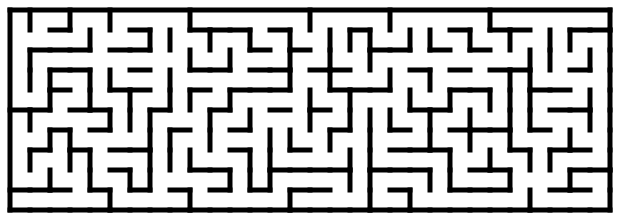

In [4]:
# Creem un laberint amb X cel·les horitzontals i Y cel.les verticals i el mostrem.
# Observeu que hem definit un 'seed'. Això vol dir que, tot i que el laberint es genera de forma aleatòria,
# tindreu tots el mateix.
maze = Maze(30, 10, seed=17)
maze.display_maze(height=200)

La longitud del camí mínim és 53


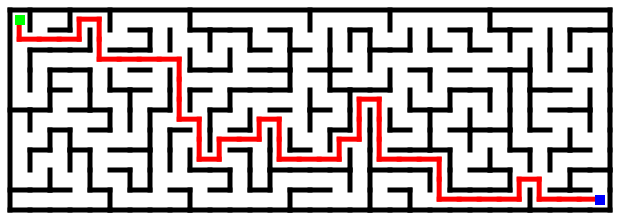

In [5]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

# La llibreria networX ja té una funció per trobar el camí mínim
A = 0                              # Node orígen (Verd) 
B = len(G.nodes)-1                 # Node destí  (Blau)
pth = nx.shortest_path(G, A, B)
print('La longitud del camí mínim és',len(pth))

# Afegim aquest camí al nostre laberint
maze.set_path(pth)

# Mostrem el resultat
maze.display_maze(plot_path=True, height=200)

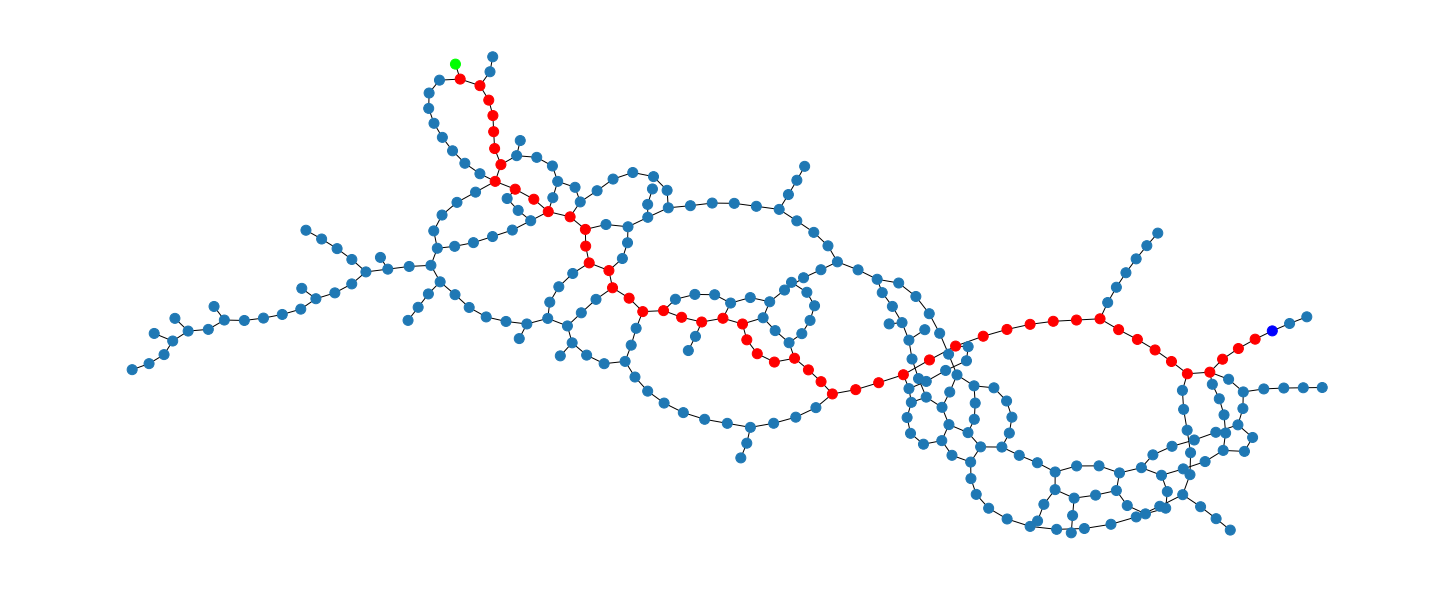

In [6]:
# Mostrem el laberint com un graf.
plt.figure(figsize=(20,8))

# Definim el color dels nodes.
# Si el node és el punt A (inici) el pintem verd, si es el node B (final) el pintem blau, si es un node del camí, vermell i finalment
# deixem el color per defecte de networkx per a la resta de nodes.

colorA, colorB, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorPTH if n in pth else colorDEF for n in G.nodes]

# Existeixen moltes formes diferents de dibuixar els graphs. La Kamada-Kawai ens permet veure el graf com un 'graf de força'.
# Aquests tipus de visualitzacions intenten que les arestes no se superposin.
pos = nx.kamada_kawai_layout(G).items()

# Com que estem dibuixant en horitzontal, canviem les coordenades x i y de cada punt.
pos = {k: v[::-1] for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

<div class="alert alert-success">
<h1>Problema 1: BFS (2.5p)</h1>
<p>
    Implementeu l'algorisme <b>BFS</b>. Donat un graf de la llibreria networX, la funció <b>bfs()</b> ha de retornar el nombre de caselles accessibles des del paràmetre <b>origin</b>, incloent-hi aquesta. És a dir, la llista retornada sempre inclourà, com a mínim, el node orígen.<br>
    Recordeu que és necessari <b>no canviar l'estructura de la funció</b>. No canvieu ni el nom de la funció, ni el nom dels paràmetres d'entrada ni els de sortida. <br>
</p>    
    
</div>

In [16]:
def bfs(G, origin):
    """
    Params
    ======    
    :G: Graf. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    
    Returns
    =======
    :visited: El conjunt de nodes visitats durant l'exploració BFS
    """
    visited, to_visit_neighbors = set(), set()
    
    # To visit sera la nostre cua on guardarem els nodes per visitar
    to_visit_neighbors.add(origin)
    
    # Afegim el primer node que ens trobem
    visited.add(origin)
    
    # Entrarem en bucle fins que es buidi la cua
    while to_visit_neighbors:
 
        # Agafem el últim valor de la cua i el treiem i guardem el seu valor que seà el nostre node_actual
        actual_node = to_visit_neighbors.pop()
         
        # Mirem tots els fills de el node actual
        for i in G.neighbors(actual_node):
            
            # Si no ha estat visitat el posem a la llista de visitats i el guardem al final
            #de la cua dels que mirarem els seus fills
            if i not in visited:
                to_visit_neighbors.add(i)
                visited.add(i)
                
    return visited

Des de la cel·la 24 podem accedir a 28 caselles
Ordre d'exploració: {0, 1, 2, 7, 8, 14, 15, 16, 21, 22, 23, 24, 28, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}


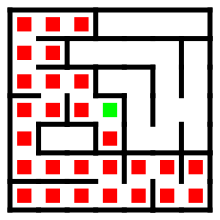

In [17]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
maze = Maze(7, 7, p_build=0.2, seed=18)
G = maze.maze_graph()

A = 24                      
visited = bfs(G, A)
num = len(visited)

print(f"Des de la cel·la {A} podem accedir a {num} caselles")
print(f"Ordre d'exploració: {visited}")
maze.set_values(visited, 1, color=(255,0,0))
maze.set_value(A, 1, color=(0,255,0))

maze.display_maze(plot_path=True, height=200)

Des de la cel·la 174 podem accedir a 146 caselles
Ordre d'exploració: {13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 33, 34, 35, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 85, 111, 112, 113, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 159, 160, 161, 162, 163, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 209, 210, 211, 212, 213, 214, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 259, 260, 261, 262, 263, 267, 268, 269, 270, 271, 272, 273, 274, 279, 280, 281, 282, 283, 284, 285, 286, 310, 311, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 329, 330, 331, 332, 333, 334}


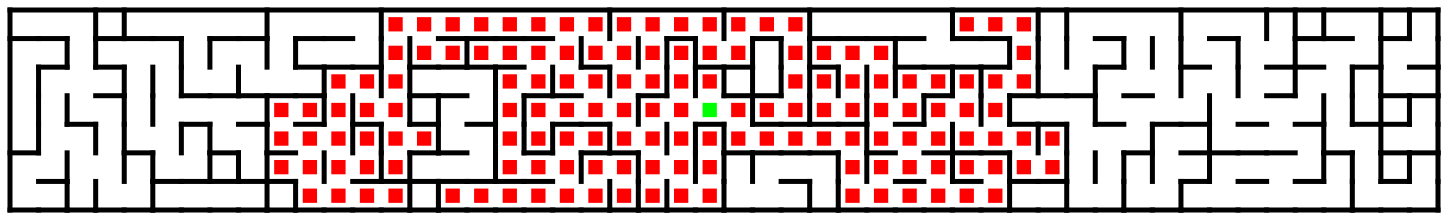

In [11]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
maze = Maze(50, 7, p_build=0.2, seed=18)
G = maze.maze_graph()

A = 174                      
visited = bfs(G, A)
num = len(visited)

print(f"Des de la cel·la {A} podem accedir a {num} caselles")
print(f"Ordre d'exploració: {visited}")
maze.set_values(visited, 1, color=(255,0,0))
maze.set_value(A, 1, color=(0,255,0))

maze.display_maze(plot_path=True, height=200)

<div class="alert alert-success">
<h1>Problema 2: Holes (2.5p)</h1>
<p>
    Implementeu una funció anomenada <b>holes()</b> que, donat un graf, un node orígen, un node destí, una llista de nodes i un paràmetre enter, trobi el camí més curt entre orígen i destí. <br>
    Si el camí passa per un dels nodes de la llista, se li aplicarà una penalització.<br>
    Heu de basar la vosta solució en l'algorisme <b>Dijkstra</b>.
</p>    
    
</div>

In [11]:
def holes(G, origin, destination, holes_list=[], penalty=50):  
    prev = {i: None for i in list(nx.nodes(G))} 
    dist = {i: float('inf') for i in list(nx.nodes(G))}
    visited = {i: False for i in list(nx.nodes(G))}
    set_holes = set(holes_list)
    path = []
    dist[origin] = 0
    pq = PriorityQueue()
    pq.put((dist[origin], origin))
    while (not pq.empty()):
        current_dist, current_node = pq.get()
        if(current_node == destination):
            break
        if(visited[current_node] == False):
            visited[current_node] = True
            for nei in G.neighbors(current_node):
                if nei in set_holes:
                    distance = current_dist + penalty
                else:
                    distance = current_dist + 1
                if distance < dist[nei]:
                    dist[nei] = distance
                    prev[nei] = current_node
                    pq.put((distance, nei))
        else:
            continue       
    node = destination
    while node != None:
        path.append(node)
        node = prev[node]
    return path[::-1]

Penalització: 2
Longitud del camí: 53


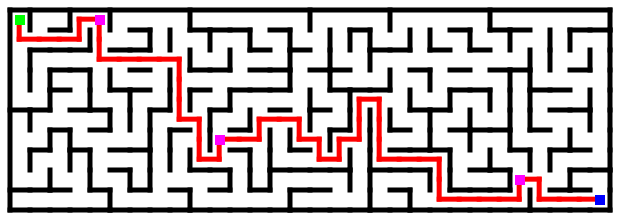

Penalització: 5
Longitud del camí: 57


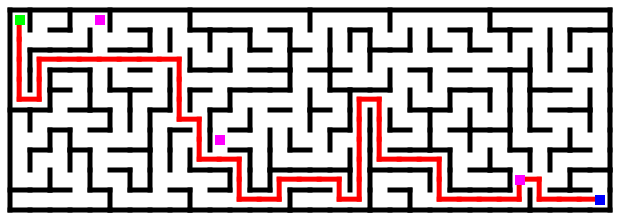

Penalització: 10
Longitud del camí: 63


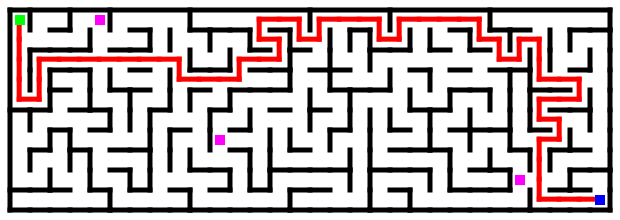

In [12]:
# Proveu el vostre algorisme!

maze = Maze(30, 10, seed=17)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

A = 0
B = len(G.nodes)-1
holes_list = [4, 190, 265]
color = (255, 0, 255)

penalties = [2,5,10]
for v in penalties:
    maze.set_values(holes_list, 1, color)
    path = holes(G, A, B, holes_list, v)
    
    maze.set_path(path)
    print(f"Penalització: {v}")
    print('Longitud del camí:', len(path))
    maze.display_maze(plot_path=True, height=200)

    maze.set_values(holes_list, 0, color)

<div class="alert alert-success">
<h1>Problema 3: Checkpoint (2.5p)</h1>
<p>
    Implementeu una funció anomenada <b>checkpoint()</b> que, donat un graf, un node origen, un node destí i un node extra, trobi el camí més curt des del node origen fins el node destí passant pel node extra. Com en l'exercici anterior, tindrem una llista de punts on aplicarem una penalització.<br>
</p>    
    
</div>

<div class="alert alert-warning">
<p>
    Quina és la complexitat d'aquest algorisme?</b><br>
</p>    

 << 2 * O( (V + E) * log(V) >>
    
</div>

In [13]:
def checkpoint(G, origin, destination, extra, holes_list=[], penalty=50):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extra: Índex d'un node extra per on ha de passar el camí
    :holes_list: Una llista de punts que tindran penalització
    :penalty: Valor enter de penalització
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per 'extra'.
    """
    path = []
    
    # Eliminem 1 perque guardem al path origen i final i el final d´un es l´orginen de l´altre i contariem dos cops un mateix node
    path = holes(G, origin, extra, holes_list, penalty) + holes(G, extra, destination, holes_list, penalty)[1:]

    return path

Penalització: 1
La distàcia del camí més curt que passa per E és: 11
El camí és: [0, 6, 12, 13, 19, 20, 21, 22, 28, 29, 35]


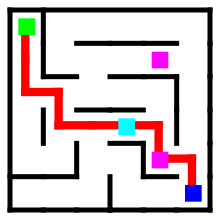

Penalització: 2
La distàcia del camí més curt que passa per E és: 11
El camí és: [0, 6, 12, 13, 19, 20, 21, 22, 28, 29, 35]


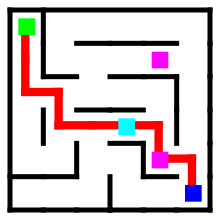

Penalització: 3
La distàcia del camí més curt que passa per E és: 11
El camí és: [0, 6, 12, 13, 19, 20, 21, 22, 28, 29, 35]


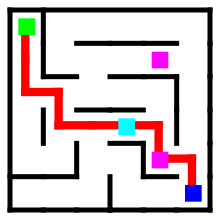

Penalització: 5
La distàcia del camí més curt que passa per E és: 13
El camí és: [0, 6, 12, 13, 19, 20, 21, 20, 26, 27, 33, 34, 35]


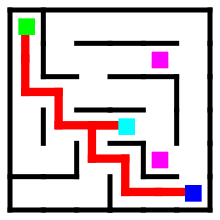

In [14]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(6,6, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi, un node extra i la llista amb penalització
A = 0
B = len(G.nodes)-1
E = 21
holes_list = [10, 28]
penalties = [1, 2, 3, 5]

for penalty in penalties:
    # La funció set_value ens permet 'activar' un node per a que surti dibuixat al laberint.
    maze.set_value(E, 1)                         # Checkpoint
    maze.set_values(holes_list, 1, (255,0,255))  # Penalitzacions

    path = checkpoint(G, A, B, E, holes_list, penalty=penalty)
    print(f'Penalització: {penalty}')
    print('La distàcia del camí més curt que passa per E és:', len(path))
    print(f'El camí és: {path}')
    maze.set_path(path)
    maze.display_maze(plot_path=True, height=200)
    
    maze.set_value(E, 0)                         # Checkpoint
    maze.set_values(holes_list, 0, (255,0,255))  # Penalitzacions

<div class="alert alert-success">
<h1>Problema 4: Checkpoints list (2.5p)</h1>
<p>
    Implementeu una funció anomenada <b>checkpoints_list()</b> que, donat un graf, un node origen, un node destí i una llista de nodes extres, trobi el camí més curt des del node origen fins el node destí passant per tots els nodes extra, en qualsevol ordre. Com en l'exercici anterior, tindrem una llista de punts on aplicarem una penalització.<br>
</p>    
    
</div>

<div class="alert alert-warning">
<p>
    Quina és la complexitat d'aquest algorisme?</b><br>
</p>    

 << Sent N número de extras és O(N!) >>
    
</div>

In [21]:
import itertools
def checkpoints_list(G, origin, destination, extras, holes_list=[], penalty=50):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extras: Llista d'índexs de nodes per on ha de passar el camí.
    :holes_list: Una llista de punts que tindran penalització
    :penalty: Valor enter de penalització
    
    Returns
    =======
    Un diccionari amb dos elements:
    
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per tots els nodes 'extras'.
    """

    path = []
    
     # Observem totes les posibles permutacions del ordre dels nodes
    listas_permutaciones = list(itertools.permutations(extras))
    
    #Inicialitzem com infinit perque la primera sigui sempre menor
    minimum_distance = float('inf')
    calculated = dict()
    
    # Observarem cada una de les permutacions
    for i in listas_permutaciones:
        
        # I par cada ordre mirarem el cost que te seguir-lo
        current_distance = 0
        current_path = []
        
        for j in range(len(extras)):
            
            #Tindrem un Dijkstra de checkpoint a checkpoint fins al final
            
            # Tindrem en conte que el primer sigui origin i el ultim sigui
            # destination després de passar per la llista de checkpoints
            
            # Si estem al primer node de la permutació
            if j == 0 :
                
                #Mirem si ja ho hem calculat
                if((origin, i[j]) in calculated.keys()):
                    current_path += calculated[(origin, i[j])]
                else:
                    
                    # Si no ho hem calculat el calculem i ho guardem al diccionari de ja calculats
                    result = holes(G, origin, i[j], holes_list, penalty)
                    current_path += result
                    
            
            # Si estem a l'ultim node de la permutació
            if j == len(extras) - 1:
                
                # Mirem si ja ho hem calculat
                if((i[j], destination) in calculated.keys()):
                    current_path += calculated[(i[j], destination)][1:]
                else:
                    result = holes(G, i[j], destination, holes_list, penalty)
                    current_path += result[1:]
                    calculated[(i[j], destination)] = result
 
            else:
                
                # Calculem les keys per no calcularles dos cops
                keys = calculated.keys()
                
                # Mirem si tenim A -> B 
                if((i[j], i[j + 1]) in keys):
                    # Ens saltem el primer perque és l´ultim de l´altre
                    current_path += calculated[(i[j],i[j + 1])][1:]

                # Sino ho calculem amb la funció holes
                else:
                    result = holes(G, i[j], i[j+1], holes_list, penalty)
                    
                    # Trellem 1 perque es l´origen i el final i si esta al mitg l´eliminem
                    current_path += result[1:]
                    
                    # Afegim al diccionari el mateix camí però del revés i el camí original
                    calculated[(i[j],i[j + 1])] = result
                    calculated[(i[j + 1], i[j])] = result[::-1]
                    
            
            # Si la distancia actual ja es més gran que la mínima trobada ja no la mirem i anem a la següent permutació
            if(len(current_path) > minimum_distance):
                break
        
        current_dist = len(current_path)
        
        # Al sortir comprobarem si es menor i si ho es, subsituim.
        if(current_dist < minimum_distance):
            
            minimum_distance = current_dist
            path = current_path
    
    return path

Penalització: 0
La distàcia del camí més curt que passa per E és: 81


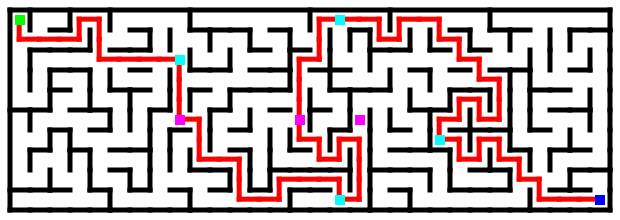

Penalització: 1
La distàcia del camí més curt que passa per E és: 81


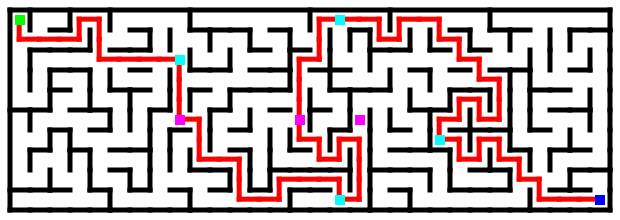

Penalització: 2
La distàcia del camí més curt que passa per E és: 81


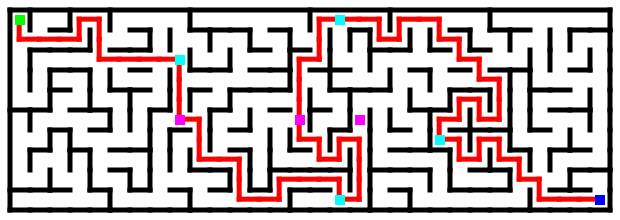

Penalització: 3
La distàcia del camí més curt que passa per E és: 85


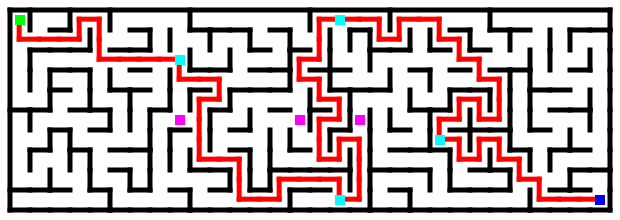

Penalització: 10
La distàcia del camí més curt que passa per E és: 85


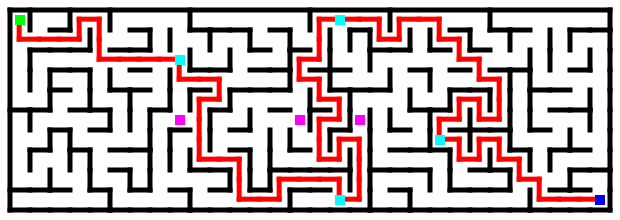

Penalització: 20
La distàcia del camí més curt que passa per E és: 85


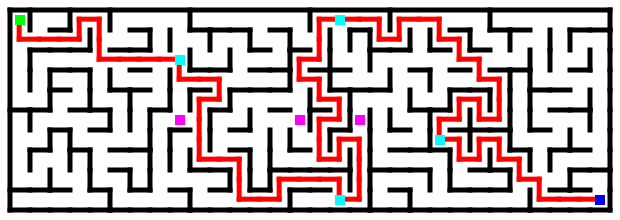

In [22]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi i node extres
A = 0
B = len(G.nodes)-1
E = [286, 201, 16, 68]
holes_list = [158,164, 167]
penalties = [0, 1, 2, 3, 10, 20]

for penalty in penalties:
    # La funció set_values ens permet 'activar' nodes per a que surtin dibuixat al laberint.
    maze.set_values(E, 1)                        # Checkpoint
    maze.set_values(holes_list, 1, (255,0,255))  # Penalitzacions

    path = checkpoints_list(G, A, B, E, holes_list, penalty=penalty)
    print(f'Penalització: {penalty}')
    print('La distàcia del camí més curt que passa per E és:', len(path))
    maze.set_path(path)
    maze.display_maze(plot_path=True, height=200)

    # De la mateixa forma la funció set_values també ens permet 'desactivar' els nodes.
    maze.set_values(E, 0)
    maze.set_values(holes_list, 0, (255,0,255))

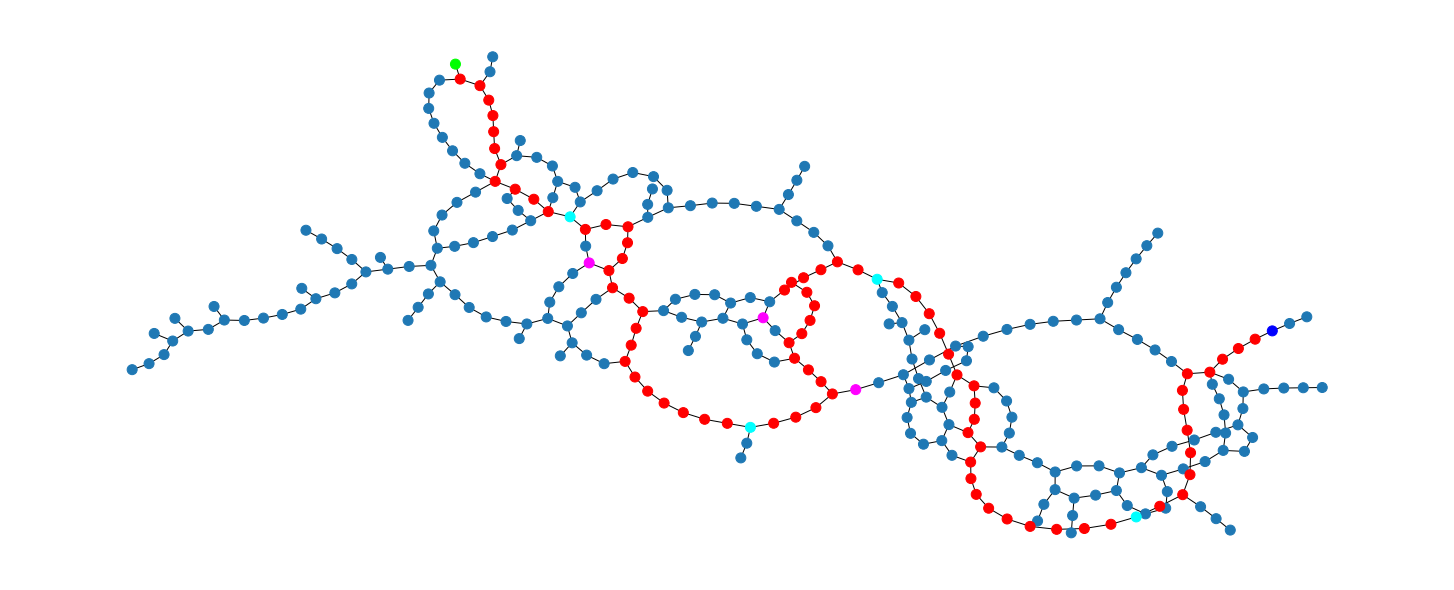

In [18]:
plt.figure(figsize=(20,8))

colorA, colorB, colorE, colorP, colorPTH, colorDEF = '#00ff00', '#0000ff', '#00ffff', '#ff00ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorE if n in E else colorP if n in holes_list else colorPTH if n in path else colorDEF for n in G.nodes]

pos = nx.kamada_kawai_layout(G).items()

pos = {k: v[::-1] for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>16 d'Octubre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, només heu d'entregar aquest fitxer .ipynb (No entregueu maze.py ni cap altre fitxer extra). El notebook ha de tenir com a nom:
</p>
<p>
    <code>Grup_Cognom_Nom_Exploracio.ipynb</code>
</p>
On 'Grup' és una sola lletra que identifica el <b>grup de laboratori</b> on esteu matriculats (A, B, C, D, E, F). 

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>